In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("mnist_data/", one_hot=True)

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [3]:
mnist.train.images.shape

(55000, 784)

In [4]:
mnist.test.images.shape

(10000, 784)

In [5]:
mnist.train.labels.shape

(55000, 10)

In [6]:
np.argmax(mnist.train.labels[0])

7

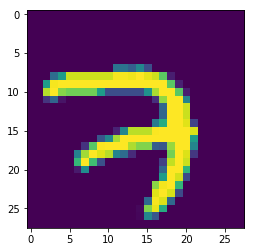

In [7]:
plt.imshow(np.reshape(mnist.train.images[0], (28,28)))

In [8]:
train = mnist.train
test = mnist.test

In [9]:
train.images.shape

(55000, 784)

In [10]:
n_input = train.images.shape[1]
n_output = len(train.labels[0])

print(n_input, n_output)

784 10


In [11]:
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

In [12]:
W = tf.get_variable(name='W',
                   shape=[n_input, n_output],
                   dtype=tf.float32,
                   initializer=tf.random_normal_initializer(mean=0.0, stddev=0.02))

b = tf.get_variable(name='B',
                   shape=[n_output,],
                    dtype=tf.float32,
                   initializer=tf.constant_initializer(0.0))

h = tf.matmul(X, W) + b

Y_pred = tf.nn.softmax(h)

In [13]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(Y_pred), reduction_indices=[1]))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [14]:
predicted_y = tf.argmax(Y_pred, 1)
actual_y = tf.argmax(Y,1)

In [15]:
correct_prediction = tf.equal(predicted_y, actual_y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [16]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 50
epochs = 5

In [31]:
for i in range(epochs):
    for _ in range(1000):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={X: batch_x, Y:batch_y})
    print("Training epoch", i)
    print("Cost", sess.run(cost, feed_dict={X:train.images, Y:train.labels}))

print(sess.run(accuracy, feed_dict={X:test.images, Y:test.labels}))

Training epoch 0
Cost 0.265378
Training epoch 1
Cost 0.258853
Training epoch 2
Cost 0.255774
Training epoch 3
Cost 0.252713
Training epoch 4
Cost 0.251059
0.9256


In [24]:
x, y = mnist.train.next_batch(50)

In [25]:
x.shape

(50, 784)

In [26]:
y.shape

(50, 10)

In [32]:
weights = np.array(sess.run(W))

In [33]:
weights.shape

(784, 10)

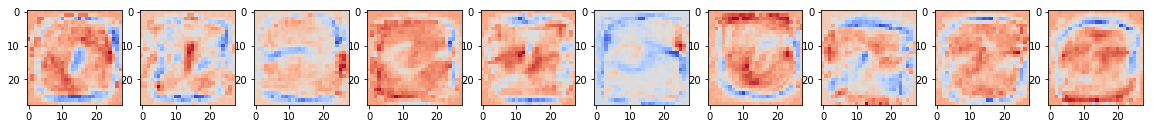

In [34]:
fig, ax = plt.subplots(1, 10, figsize=(20,3))

for col_i in range(10):
    ax[col_i].imshow(weights[:, col_i].reshape((28,28)), cmap='coolwarm')